# Projeto ADC

## Import libraries

In [3]:
from datetime import datetime
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pyarrow.parquet as pq

## Converter txt para parquet

In [4]:
# product_id = []
# user_id = []
# rev_score = []
# rev_time = []

# with open("movies.txt", encoding="utf-8", errors="ignore") as file:
    
#     block = []
#     for line in file:
#         if line.strip() == "":
#             if block:
#                 for item in block:
#                     if item.startswith("product/productId:"):
#                         product_id.append(item.split(": ")[1].strip())
#                     elif item.startswith("review/userId:"):
#                         user_id.append(item.split(": ")[1].strip())
#                     elif item.startswith("review/score:"):
#                         rev_score.append(float(item.split(": ")[1].strip()))
#                     elif item.startswith("review/time:"):
#                         rev_time.append(int(item.split(": ")[1].strip()))
#                 block = []
#         else:
#             block.append(line.strip())

#     # Process the last block if the file does not end with a blank line
#     if block:
#         for item in block:
#             if item.startswith("product/productId:"):
#                 product_id.append(item.split(": ")[1].strip())
#             elif item.startswith("review/userId:"):
#                 user_id.append(item.split(": ")[1].strip())
#             elif item.startswith("review/score:"):
#                 rev_score.append(float(item.split(": ")[1].strip()))
#             elif item.startswith("review/time:"):
#                 rev_time.append(int(item.split(": ")[1].strip()))
    
# # make dataframe
# df = pd.DataFrame(
#     {
#         "prod_id": product_id,
#         "user_id": user_id,
#         "rev_score": rev_score,
#         "rev_time": rev_time
#     }
# )

# # make parquet file
# df.to_parquet("movies.parquet")

## Pandas dataframe

In [5]:
movies_pq = pd.read_parquet("movies.parquet")

#print do n de rows (esperado 7911684)
print("Number of rows: ", movies_pq.shape[0])
print("Number of unique time values: ", movies_pq["rev_time"].nunique())
print("Number of unique user_id values: ", movies_pq["user_id"].nunique())
print("Number of unique prod_id values: ", movies_pq["prod_id"].nunique())

#remove rows where user_id and prod_id are duplicated
movies_pq.drop_duplicates(subset=["user_id", "prod_id"], inplace=True)

print("Number of rows after removing duplicates: ", movies_pq.shape[0])
print("Number of unique time values after removing duplicates: ", movies_pq["rev_time"].nunique())
print("Number of unique user_id values after removing duplicates: ", movies_pq["user_id"].nunique())
print("Number of unique prod_id values after removing duplicates: ", movies_pq["prod_id"].nunique())

Number of rows:  7911684
Number of unique time values:  5255
Number of unique user_id values:  889176
Number of unique prod_id values:  253059
Number of rows after removing duplicates:  7831442
Number of unique time values after removing duplicates:  5254
Number of unique user_id values after removing duplicates:  889176
Number of unique prod_id values after removing duplicates:  253059


## Reviews per

### Year

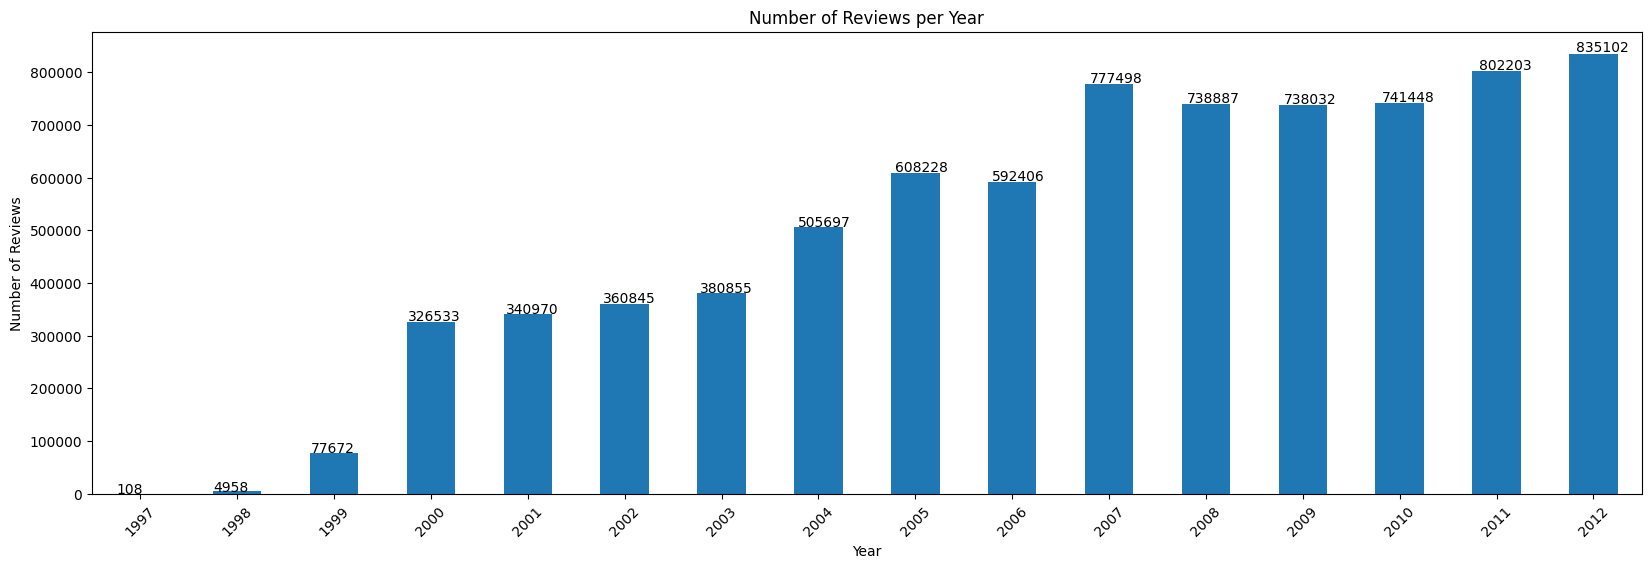

In [6]:
# Ensure the 'rev_time' column is in datetime format
movies_pq['rev_time'] = pd.to_datetime(movies_pq['rev_time'], unit='s')

# Extract the year from the 'rev_time' column
movies_pq['year'] = movies_pq['rev_time'].dt.year

# Group by the year and count the number of reviews
yearly_reviews = movies_pq.groupby('year').size()

# Plot the bar graph
plt.figure(figsize=(20, 6))
ax = yearly_reviews.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per Year')
plt.xticks(rotation=45)

# Add the number of reviews to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

### Quarter

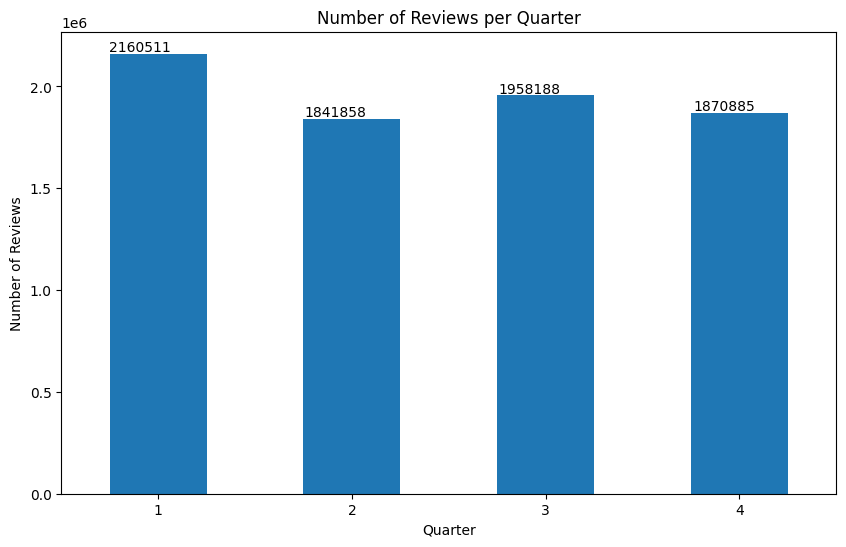

In [7]:
# Create a new column for the quarter
movies_pq['quarter'] = movies_pq['rev_time'].dt.quarter

# Group by the quarter and count the number of reviews
quarterly_reviews = movies_pq.groupby('quarter').size()

# Plot the bar graph
plt.figure(figsize=(10, 6))
ax = quarterly_reviews.plot(kind='bar')
plt.xlabel('Quarter')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per Quarter')
plt.xticks(rotation=0)

# Add the number of reviews to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

### Quarter pattern in a year

C:\Users\joaop\AppData\Local\Temp\ipykernel_30360\544836259.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_reviews['month'] = filtered_reviews['rev_time'].dt.month


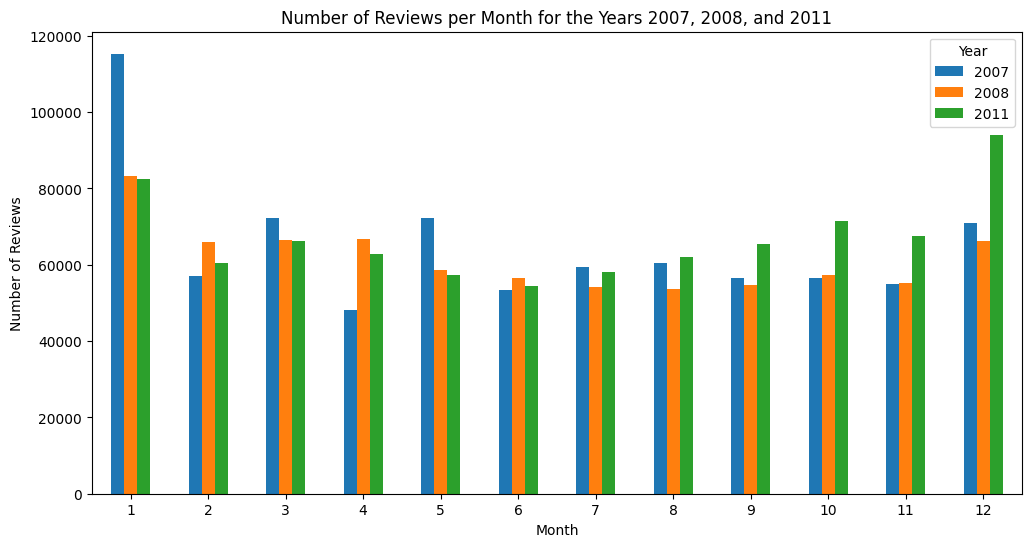

In [8]:
# Filter the dataframe for the years 2007, 2008, and 2011
filtered_reviews = movies_pq[movies_pq['year'].isin([2007, 2008, 2011])]

# Extract the month from the 'rev_time' column
filtered_reviews['month'] = filtered_reviews['rev_time'].dt.month

# Group by year and month and count the number of reviews
monthly_reviews = filtered_reviews.groupby(['year', 'month']).size().unstack(level=0)

# Plot the bar graph
monthly_reviews.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per Month for the Years 2007, 2008, and 2011')
plt.xticks(rotation=0)
plt.legend(title='Year')

plt.show()

## Top X

### Users with most reviews

In [9]:
# Group by user_id and count the number of reviews for each user
user_review_counts = movies_pq['user_id'].value_counts()

# Get the top 10 users with the most reviews
top_10_users = user_review_counts.head(10)

# Print the IDs of the top 10 users
print("Top 10 users with the most reviews:")
print(top_10_users)

Top 10 users with the most reviews:
user_id
A16CZRQL23NOIW    10777
A3LZGLA88K0LA0    10262
ANCOMAI0I7LVG      9611
A2NJO6YE954DBH     8636
ABO2ZI2Y5DQ9T      7991
A39CX0EE4BZCZC     7657
A35ZK3M8L9JUPX     7590
A10ODC971MDHV8     7440
A328S9RN3U5M68     7185
A1X054KUYG5V       6711
Name: count, dtype: int64


### Products with most reviews

In [10]:
# Group by prod_id and count the number of reviews for each product
product_review_counts = movies_pq['prod_id'].value_counts()

# Get the top 10 products with the most reviews
top_20_products = product_review_counts.head(20)

# Print the IDs of the top 10 products
print("Top 20 products with the most reviews:")
print(top_20_products)

Top 20 products with the most reviews:
prod_id
B002QZ1RS6    956
B007FQDPL8    952
B001KZG99A    918
B00005JPS8    918
B001I1NGHY    918
B001C08RHA    918
B001GAPC1K    918
B001FD5KJM    918
B001HUHBE0    917
B001FZ9AAU    917
B004JMSIRC    917
B000H7I6CU    901
B002LW9ITY    899
B000ENV5WK    899
7883685635    899
B000V1Y43W    899
B004OBQDJ8    899
B00005JNS0    899
B000H5U832    899
B0049J3QF4    899
Name: count, dtype: int64


### Products per review amount

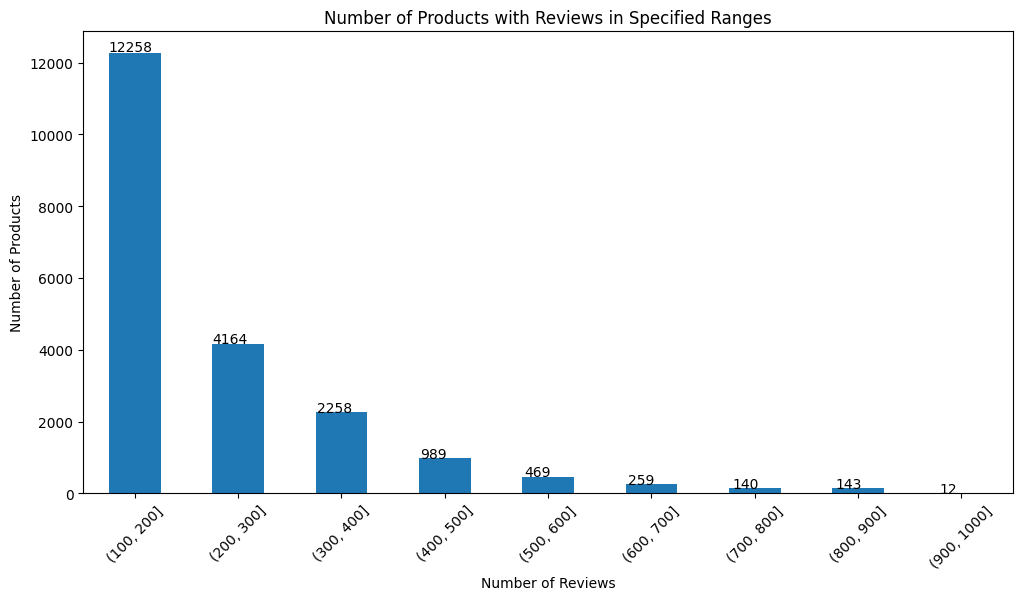

In [11]:
# Define the bins for the number of reviews
bins = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# Count the number of products that fall into each bin
product_review_bins = pd.cut(product_review_counts, bins=bins).value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(12, 6))
ax = product_review_bins.plot(kind='bar')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Products')
plt.title('Number of Products with Reviews in Specified Ranges')
plt.xticks(rotation=45)

# Add the number of products to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

### Products with highest average rating

In [12]:
# Group by prod_id and calculate the average rating for each product
average_ratings = movies_pq.groupby('prod_id')['rev_score'].mean()

# Get the top 10 products with the highest average rating
top_10_best_rated_products = average_ratings.nlargest(10)

# Print the IDs of the top 10 products with the best average rating
print("Top 10 products with the best average rating:")
print(top_10_best_rated_products)

Top 10 products with the best average rating:
prod_id
0001501348    5.0
0001516035    5.0
0001517791    5.0
0001526863    5.0
000500005X    5.0
000500411X    5.0
0005019222    5.0
0005041104    5.0
0005055121    5.0
0005059836    5.0
Name: rev_score, dtype: float64


## User with the most reviews - A16CZRQL23NOIW
### First and last review date

In [13]:
# Filter the dataframe for the user with userID 'A16CZRQL23NOIW'
user_reviews = movies_pq[movies_pq['user_id'] == 'A16CZRQL23NOIW']

# Get the oldest and newest review times
oldest_review = user_reviews['rev_time'].min()
newest_review = user_reviews['rev_time'].max()

print("Oldest review date: ", oldest_review)
print("Newest review date: ", newest_review)

Oldest review date:  2004-03-23 00:00:00
Newest review date:  2012-10-21 00:00:00


In [14]:
# Filter the dataframe for the user with userID 'A16CZRQL23NOIW' and the date 2001-09-11
reviews_on_2001_09_11 = user_reviews[user_reviews['rev_time'] == '2001-09-11']

# Check if there are any reviews on that date
print(reviews_on_2001_09_11)

Empty DataFrame
Columns: [prod_id, user_id, rev_score, rev_time, year, quarter]
Index: []


## Product with the most reviews - B002QZ1RS6
### First and last review date

In [15]:
# Filter the dataframe for the product with prod_id 'B002QZ1RS6'
product_reviews = movies_pq[movies_pq['prod_id'] == 'B002QZ1RS6']

# Get the oldest and newest review times
oldest_product_review = product_reviews['rev_time'].min()
newest_product_review = product_reviews['rev_time'].max()

print("Oldest review date for product B002QZ1RS6: ", oldest_product_review)
print("Newest review date for product B002QZ1RS6: ", newest_product_review)

Oldest review date for product B002QZ1RS6:  2009-09-30 00:00:00
Newest review date for product B002QZ1RS6:  2012-10-25 00:00:00


## Missing dates

In [16]:
# Filter the data for the desired time range
start_date = '1997-08-01'
end_date = '2012-10-31'

#print every unique day not in the dataset betwwen these dates
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
missing_dates = date_range[~date_range.isin(movies_pq['rev_time'].dt.date.unique())]
print("Missing dates: ", missing_dates)

Missing dates:  DatetimeIndex(['1997-08-01', '1997-08-02', '1997-08-03', '1997-08-04',
               '1997-08-05', '1997-08-06', '1997-08-07', '1997-08-08',
               '1997-08-09', '1997-08-10',
               ...
               '1998-11-14', '1998-11-15', '1998-11-16', '2001-10-07',
               '2012-10-26', '2012-10-27', '2012-10-28', '2012-10-29',
               '2012-10-30', '2012-10-31'],
              dtype='datetime64[ns]', length=317, freq=None)


## Mistery of the missing reviews

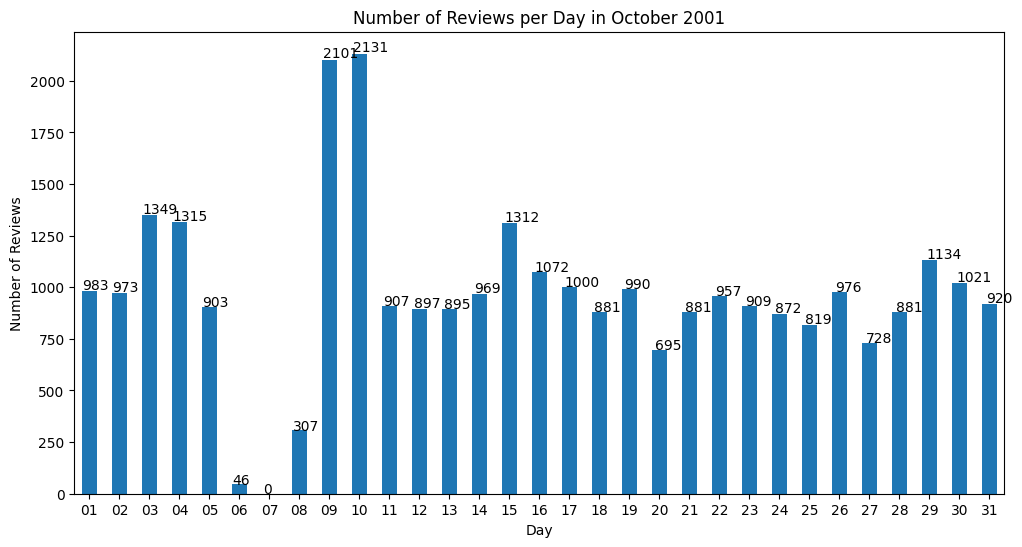

In [17]:
# Filter the dataframe for October 2001
october_2001_reviews = movies_pq[(movies_pq['rev_time'] >= '2001-10-01') & (movies_pq['rev_time'] <= '2001-10-31')]

# Group by day and count the number of reviews
daily_reviews_october_2001 = october_2001_reviews.groupby(october_2001_reviews['rev_time'].dt.date).size()

# Create a date range for October 2001
october_2001_range = pd.date_range(start='2001-10-01', end='2001-10-31')

# Reindex the series to include all days in October 2001, filling missing days with zeros
daily_reviews_october_2001 = daily_reviews_october_2001.reindex(october_2001_range, fill_value=0)

# Plot the bar graph
plt.figure(figsize=(12, 6))
ax = daily_reviews_october_2001.plot(kind='bar')
plt.xlabel('Day')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per Day in October 2001')
plt.xticks(rotation=0)

# Format the x-axis labels to only show the day
ax.set_xticklabels([date.strftime('%d') for date in daily_reviews_october_2001.index])

# Add the number of reviews to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

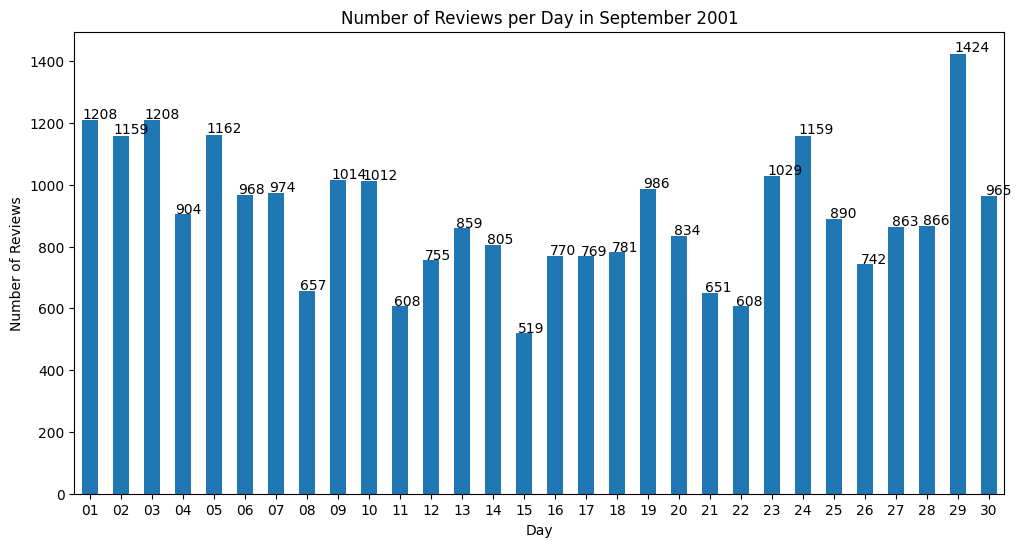

In [18]:
# Filter the dataframe for September 2001
september_2001_reviews = movies_pq[(movies_pq['rev_time'] >= '2001-09-01') & (movies_pq['rev_time'] <= '2001-09-30')]

# Group by day and count the number of reviews
daily_reviews_september_2001 = september_2001_reviews.groupby(september_2001_reviews['rev_time'].dt.date).size()

# Create a date range for September 2001
september_2001_range = pd.date_range(start='2001-09-01', end='2001-09-30')

# Reindex the series to include all days in September 2001, filling missing days with zeros
daily_reviews_september_2001 = daily_reviews_september_2001.reindex(september_2001_range, fill_value=0)

# Plot the bar graph
plt.figure(figsize=(12, 6))
ax = daily_reviews_september_2001.plot(kind='bar')
plt.xlabel('Day')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per Day in September 2001')
plt.xticks(rotation=0)

# Format the x-axis labels to only show the day
ax.set_xticklabels([date.strftime('%d') for date in daily_reviews_september_2001.index])

# Add the number of reviews to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()